# Quantum tomography for n-qubit

Init state: general GHZ
Target state: 1 layer

This case looks like GHZ_initstate but more complex reconstructed circuit

The strategy will be the same but the reconstructed circuit now is more complex, it has more paramter gates and can be arrange like layers. 

<img src="../../images/layer.png" width=500px/>

The barrier splits constructing GHZ state circuit and reconstructed layers:

<img src="../../images/ghz_state_reconstructed.png"/>

In [2]:
import qiskit, sys
sys.path.insert(1, '../../')
import qtm.base, qtm.constant, qtm.ansatz, qtm.qcompilation, qtm.state

In [5]:
num_qubits = 3
num_layers = 1
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.state.create_ghz_state(num_qubits).inverse(),
    vdagger = qtm.Wchain_ZXZlayer_ansatz(num_qubits, num_layers),
    optimizer = 'adam',
    loss_func='loss_fubini_study'
)
compiler.fit(num_steps=100, verbose = 1)

Step:   0%|          | 0/100 [00:00<?, ?it/s]

Step: 100%|██████████| 100/100 [01:07<00:00,  1.49it/s]


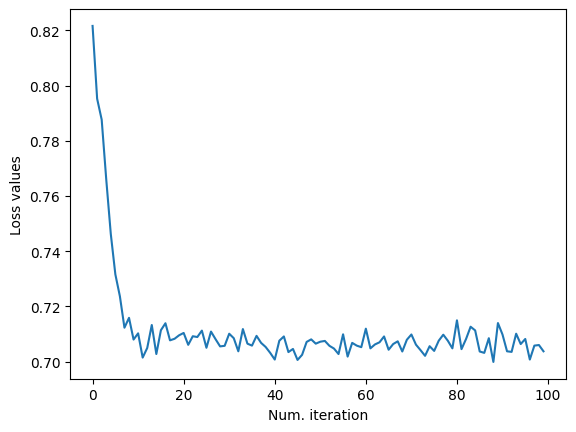

In [6]:
compiler.plot()

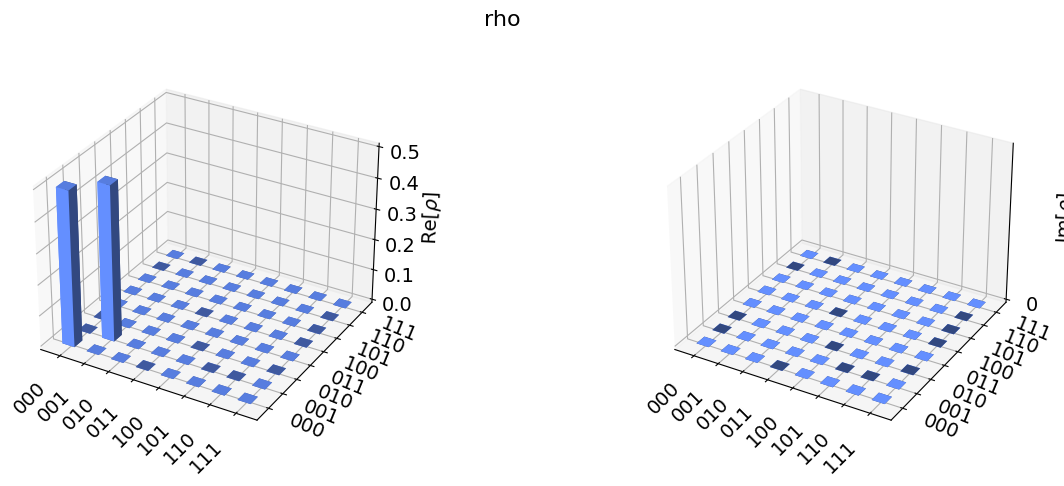

In [7]:
rho = qiskit.quantum_info.DensityMatrix.from_instruction(compiler.u)
qc = (compiler.vdagger.bind_parameters(compiler.thetas)).inverse()
sigma = qiskit.quantum_info.DensityMatrix.from_instruction(qc)
qiskit.visualization.plot_state_city(rho, title = 'rho')

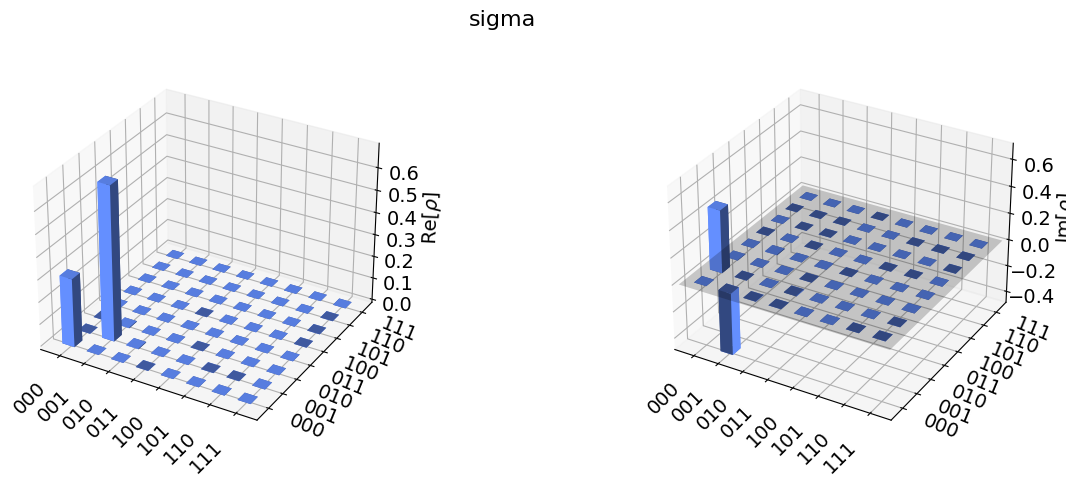

In [8]:
qiskit.visualization.plot_state_city(sigma, title = 'sigma')